In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

df = pd.read_csv("corrected.csv",encoding="cp1252")


# Visualisations

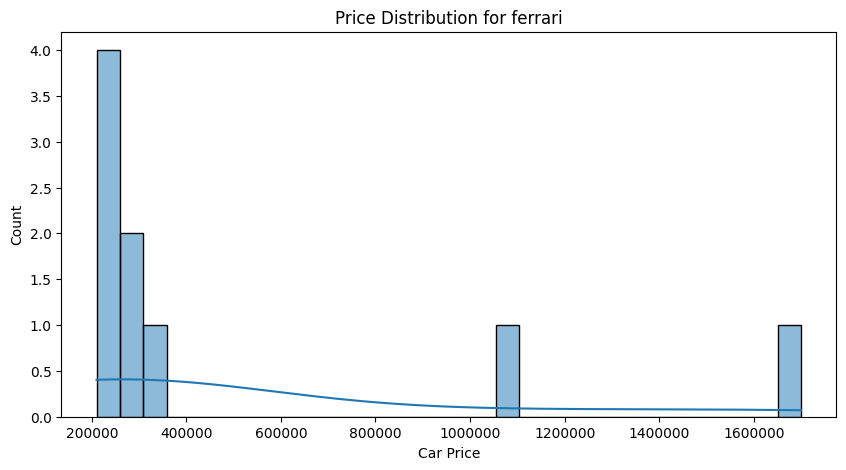

In [2]:
os.makedirs("plots", exist_ok=True)
# user input for brand
brand = input("Enter car brand: ")
plt.figure(figsize=(10,5))
# search for brand
brand_df = df[df["Company Names"].str.lower() == brand.lower()]

# Check if brand exists
if brand_df.empty:
    print(f"No data found for brand: {brand}")
else:
    sns.histplot(data=brand_df, x="Cars Prices", bins=30, kde=True)

    plt.title(f"Price Distribution for {brand}")
    plt.xlabel("Car Price")
    plt.ylabel("Count")


    plt.ticklabel_format(style="plain", axis="x")
    plt.savefig("plots/histrogram.png")
    plt.show()
  

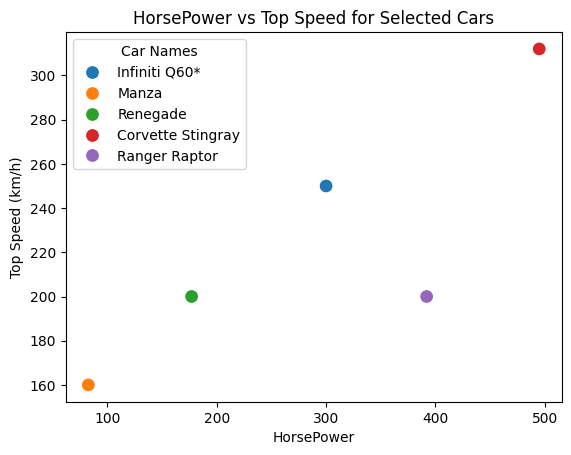

In [3]:

user_input = input("Enter 5 car names, separated by commas (or type 'r' for 5 random cars): ")

if user_input.lower() == "r":
    # Pick 5 random cars from the dataframe
    cars = random.sample(list(df["Cars Names"].unique()), 5)
else:
    cars = [car.strip() for car in user_input.split(",")]

# Filter dataframe for those cars
selected_df = df[df["Cars Names"].isin(cars)]

# Check if any entered car names were not found
missing = set(cars) - set(selected_df["Cars Names"])
if missing:
    print(f"Warning: These cars were not found in the dataset: {', '.join(missing)}")

# Plot scatterplot: Horsepower vs Top Speed
sns.scatterplot(data=selected_df, x="HorsePower", y="Total Speed", hue="Cars Names", s=100)

plt.title("HorsePower vs Top Speed for Selected Cars")
plt.xlabel("HorsePower")
plt.ylabel("Top Speed (km/h)")
plt.legend(title="Car Names")
plt.savefig("plots/scatter.png", dpi=300, bbox_inches="tight")
plt.show()

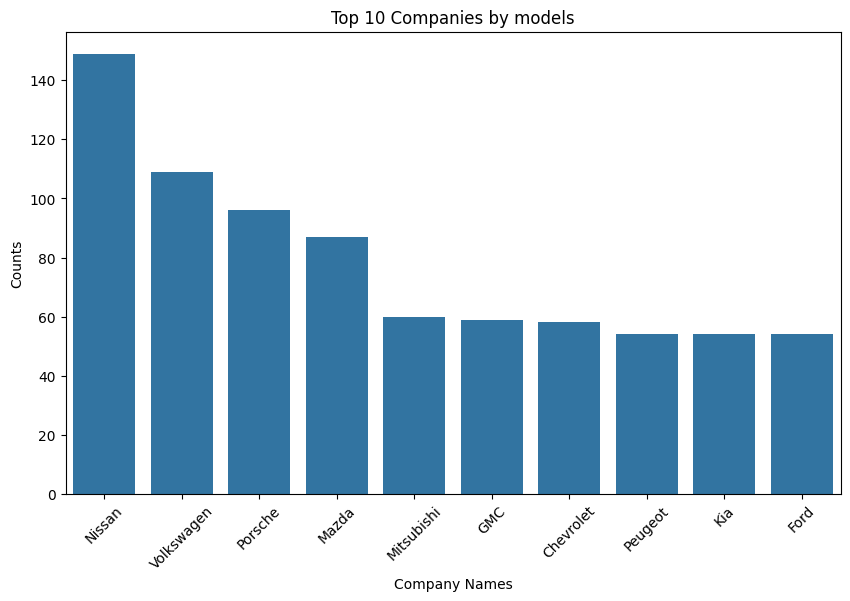

In [4]:
# Get top 10 companies
top_df = df["Company Names"].value_counts().head(10).to_frame().reset_index()
top_df.columns = ["Company Names", "Counts"]

# Plot
plt.figure(figsize=(10,6))

sns.barplot(data=top_df, x="Company Names", y="Counts")
plt.xticks(rotation=45)  # Rotate labels so they dont merge (VW)
plt.title("Top 10 Companies by models")
plt.savefig("plots/top10.png", dpi=300, bbox_inches="tight")
plt.show()
